In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import scipy.stats as ss
import seaborn as sb
import math

In [62]:
# 2. Завантажити набір даних у DataFrame і вивести на екран перші декілька рядків. 

df = pd.read_csv('train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
# 4. Вивести на екран кількість рядків та стовпців у DataFrame, типи стовпців DataFrame. 

print(df.dtypes)
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Rows:  891
Columns:  12


In [64]:
# 5. Вивести таблицю з основними характеристиками кожної ознаки 
#    для кількісних ознак – мінімум, максимум, середнє, середньоквадратичне відхилення, 1-й, 2-й та 3-й квартилі; 
#    для якісних – кількість унікальних значень, частота кожного унікального значення. 

def quantitative(df) : 
    table = pd.DataFrame(columns={"Показник" : 1, "Мінімум": 2, "Максимум": 3, "Середнє": 4, "Середньоквадратичне відхилення": 5, "1-й квартиль": 6, "2-й квартиль": 7, "3-й квартиль": 8})
    table.loc[len(table)] = ["Age", df["Age"].min(), df["Age"].max(), df["Age"].mean(), df["Age"].std(), df["Age"].quantile(0.25), df["Age"].quantile(0.50), df["Age"].quantile(0.75)]
    table.loc[len(table)] = ["SibSp", df["SibSp"].min(), df["SibSp"].max(), df["SibSp"].mean(), df["SibSp"].std(), df["SibSp"].quantile(0.25), df["SibSp"].quantile(0.50), df["SibSp"].quantile(0.75)]
    table.loc[len(table)] = ["Parch", df["Parch"].min(), df["Parch"].max(), df["Parch"].mean(), df["Parch"].std(), df["Parch"].quantile(0.25), df["Parch"].quantile(0.50), df["Parch"].quantile(0.75)]
    table.loc[len(table)] = ["Fare", df["Fare"].min(), df["Fare"].max(), df["Fare"].mean(), df["Fare"].std(), df["Fare"].quantile(0.25), df["Fare"].quantile(0.50), df["Fare"].quantile(0.75)]
    display(table.style.hide_index()) 


def qualitative (df) : 
    table = pd.DataFrame(columns={"Показник" : 1, "Кількість унікальних значень": 2, "Частота кожного унікального значення": 3, "Відносна частота кожного унікального значення": 4})
    table.loc[len(table)] = ["Survived", df["Survived"].nunique(), df["Survived"].value_counts(dropna=False), df["Survived"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Pclass", df["Pclass"].nunique(), df["Pclass"].value_counts(dropna=False), df["Pclass"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Sex", df["Sex"].nunique(), df["Sex"].value_counts(dropna=False), df["Sex"].value_counts(dropna=False, normalize=True)]
    table.loc[len(table)] = ["Embarked", df["Embarked"].nunique(), df["Embarked"].value_counts(dropna=False), df["Embarked"].value_counts(dropna=False, normalize=True)]
    display(table.style.hide_index()) 
    
print("\nКількісні показники\n")
quantitative(df)
print("\nЯкісні показники\n")
qualitative (df)


Кількісні показники



Показник,Мінімум,Максимум,Середнє,Середньоквадратичне відхилення,1-й квартиль,2-й квартиль,3-й квартиль
Age,0.420000,80.000000,29.699118,14.526497,20.125000,28.000000,38.000000
SibSp,0.000000,8.000000,0.523008,1.102743,0.000000,0.000000,1.000000
Parch,0.000000,6.000000,0.381594,0.806057,0.000000,0.000000,0.000000
Fare,0.000000,512.329200,32.204208,49.693429,7.910400,14.454200,31.000000



Якісні показники



Показник,Кількість унікальних значень,Частота кожного унікального значення,Відносна частота кожного унікального значення
Survived,2,"0 549 1 342 Name: Survived, dtype: int64","0 0.616162 1 0.383838 Name: Survived, dtype: float64"
Pclass,3,"3 491 1 216 2 184 Name: Pclass, dtype: int64","3 0.551066 1 0.242424 2 0.206510 Name: Pclass, dtype: float64"
Sex,2,"male 577 female 314 Name: Sex, dtype: int64","male 0.647587 female 0.352413 Name: Sex, dtype: float64"
Embarked,3,"S 644 C 168 Q 77 NaN 2 Name: Embarked, dtype: int64","S 0.722783 C 0.188552 Q 0.086420 NaN 0.002245 Name: Embarked, dtype: float64"


In [65]:
# 6. Перевірити наявність пропусків в наборі даних, вивести на екран кількість пропущених значень у кожному стовпці. 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

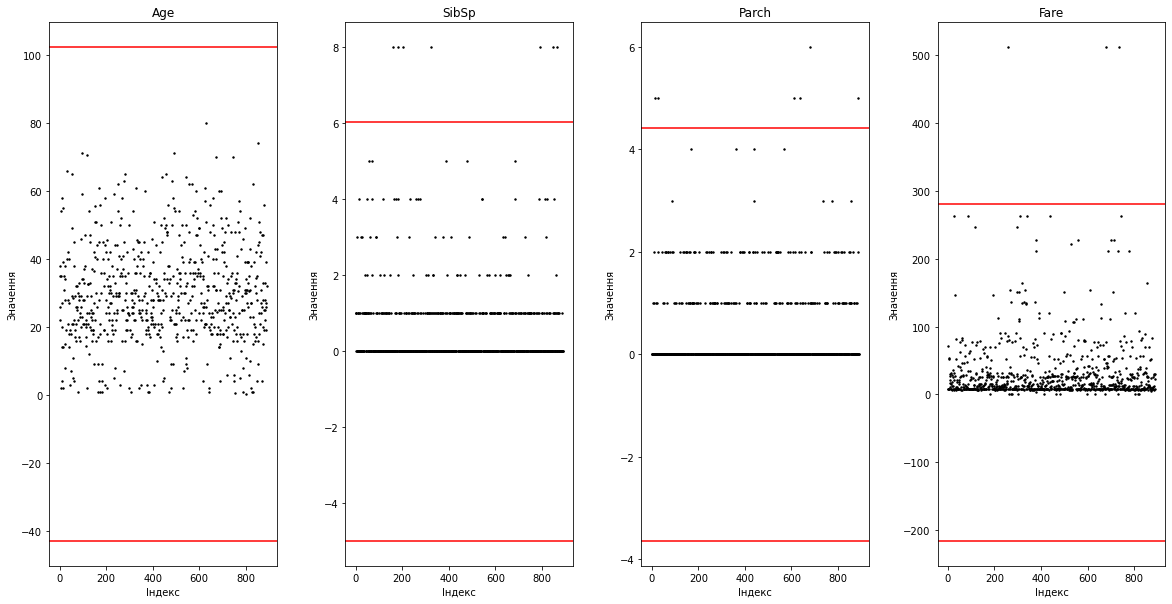

In [66]:
#7. Перевірити наявність аномальних значень в наборі даних. 
#    З цією метою для кожного якісного показника проаналізувати його можливі значення та їх частоти.
#    Для кожного кількісного показника: 
#    1) розрахувати межі діапазону [a; b]; 
#    2) побудувати графік, в якому за віссю абсцис відкласти індекси об’єктів, а за віссю ординат – значення показника; 
#    3) на цей же графік додати дві паралельні лінії, що відповідають межам a, b (приклад графіка можна знайти на слайді 7 у 2й презентації); 

def get_diapazon(data) :
    u = 5
    mean = data.mean()
    std = data.std()
    a = mean - (u * std)
    b = mean + (u * std)
    return a, b

def get_anomalies_chart(data, title) :
    chart = plt.scatter(data.index, data, color = 'black', s = 2)
    plt.title(title)
    plt.xlabel("Індекс")
    plt.ylabel("Значення")
    a, b = get_diapazon(data)
    plt.axhline(y = a, color = 'r')
    plt.axhline(y = b, color = 'r')
    return chart

def get_figure_an(df) :
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 4, 1)
    chart = get_anomalies_chart(df["Age"], "Age")
    plt.subplot(1, 4, 2)
    chart = get_anomalies_chart(df["SibSp"], "SibSp")
    plt.subplot(1, 4, 3)
    chart = get_anomalies_chart(df["Parch"], "Parch")
    plt.subplot(1, 4, 4)
    chart = get_anomalies_chart(df["Fare"], "Fare")
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    
    
get_figure_an(df)

In [67]:
#    4) проаналізувавши графік, дійти висновку, які саме значення знаходяться як аномалії на основі розрахованих меж a, b і які в дійсності значення варто вважати аномаліями
#    (викидами). Знайдені аномалії помітити як пропуски. 

def replace_anomalies(title) :
    a, b = get_diapazon(df[title])
    df.loc[(df[title] < a), title] = None
    df.loc[(df[title] > b), title] = None
    
    
#replace_anomalies("Age")    
#replace_anomalies("SibSp")    
#replace_anomalies("Parch")    
replace_anomalies("Fare")

# Явні аномальні значення присутні тільки в стовпці Fare, хоча вони можуть бути не аномаліями, а білетами ультра-люкс класу, 
# в інших випадках явних аномальних даних на мою думку немає

In [68]:
# перевірка нових пропусків

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             3
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 8. Якщо у наборі даних є пропуски, видалити або заповнити їх. Потрібно вміти видаляти усі та лише частину рядків/стовпців з пропусками, 
#    а також заповнювати пропуски середнім значенням/медіаною/модою по усій вибірці та по даним лише відповідного класу. 

In [285]:
# видалення всіх

df = df.dropna()
df = df.reset_index(drop = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
161,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1.0,1.0,11751,52.5542,D35,S
162,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0.0,0.0,695,5.0000,B51 B53 B55,S
163,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0.0,1.0,11767,83.1583,C50,C
164,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S


In [19]:
# видалення за стовпцем

df = df.dropna(subset = ["Age"])
df = df.reset_index(drop = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
# видалення всіх рядків, в яких менше ніж N не-NaN значень

df = df.dropna(thresh = 4)
df = df.reset_index(drop = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
# заміна пропусків середнім

for name, values in df[["Age", "SibSp", "Parch", "Fare"]].iteritems() :
    mean = values.mean()
    values = values.fillna(mean)
    df[name] = values
    
    

In [69]:
means = df.mean()
df = df.fillna(means)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [95]:
# заміна пропусків медіаною

for name, values in df[["Age", "SibSp", "Parch", "Fare"]].iteritems() :
    median = values.median()
    values = values.fillna(mean)
    df[name] = values

In [104]:
# заміна пропусків модою

for name, values in df[["Age", "SibSp", "Parch", "Fare"]].iteritems() :
    mode = values.mode()
    values = values.fillna(mean)
    df[name] = values

In [70]:
# заміна пропусків у якісних показниках найчисленнішим 

for name, values in df[["Survived", "Pclass", "Sex", "Embarked"]].iteritems() :
    val = list(values.value_counts(dropna=False).to_dict().keys())[0]
    values = values.fillna(val)
    df[name] = values

In [71]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

([<matplotlib.patches.Wedge at 0x24b081bd730>,
 [Text(-0.3925749350994583, 1.0275626113924428, '0'),
  Text(0.3925750313068116, -1.0275625746369201, '1')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

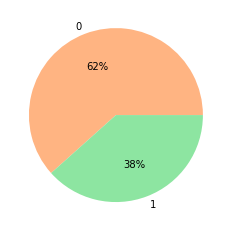

In [72]:
# 9. Перевірити, чи збалансовані класи. Для цього побудувати стовпчасту або кругову діаграму, що відображає долю об’єктів кожного класу в наборі даних. 

plt.pie(df['Survived'].value_counts(dropna=False), labels=df['Survived'].unique(), autopct='%.0f%%', colors=sb.color_palette('pastel')[1:3])

#Класи не дуже збалансовані

In [189]:
# 10. Виконати перетворення якісних ознак. Необхідно опанувати два типи перетворень: 
#     перетворення кожної якісної ознаки в набір бінарних ознак (даммі змінних) та 
#     перекодування значень ознаки в числа. 

In [36]:
# Перекодування

unique = df['Sex'].unique().tolist()
size_u = len(unique)

for j in range(size_u) :
    for i in range(df["Sex"].size) :
        if df["Sex"][i] == unique[j] :
            df["Sex"][i] = j

<ipython-input-36-4c5e89052f29>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"][i] = j


In [73]:
# Перекодування

df["Sex"] = df["Sex"].map({'male': 0, 'female': 1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [37]:
# Бінаризація

unique = df['Embarked'].unique().tolist()
size_u = len(unique)

# unique ['S', 'C', 'Q']

df['S'] = 0
df['C'] = 0

for i in range(df["Embarked"].size) :
    if df["Embarked"][i] == 'S' :
        df['S'][i] = 1
    elif df["Embarked"][i] == 'C' :
        df['C'][i] = 1
    else :
        continue

df = df.drop(columns = ['Embarked'], axis = 1)
df

<ipython-input-37-cd33cd2dbbbb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S'][i] = 1
<ipython-input-37-cd33cd2dbbbb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C'][i] = 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,1,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,0,1


In [49]:
# Бінаризація

embarked_dummies = pd.get_dummies(df['Embarked'])
df['C'] = embarked_dummies['C']
df['Q'] = embarked_dummies['Q']
df = df.drop(columns = ['Embarked'], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0


In [57]:
pclass_dummies = pd.get_dummies(df['Pclass'])
df['First'] = pclass_dummies[1]
df['Second'] = pclass_dummies[2]
df = df.drop(columns = ['Pclass'], axis = 1)
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,First,Second
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,0,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,0,0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,0,1,0


In [74]:
df = pd.get_dummies(df, columns=['Pclass','Embarked'], drop_first=True)
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,0,0,0,0


In [38]:
unique = df['Pclass'].unique().tolist()
size_u = len(unique)

# unique [1, 2, 3]

df['First'] = 0
df['Second'] = 0

for i in range(df["Pclass"].size) :
    if df["Pclass"][i] == 1 :
        df['First'][i] = 1
    elif df["Pclass"][i] == 2 :
        df['Second'][i] = 1
    else :
        continue

df = df.drop(columns = ['Pclass'], axis = 1)
df

<ipython-input-38-0ae1a26f7ce5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['First'][i] = 1
<ipython-input-38-0ae1a26f7ce5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Second'][i] = 1


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C,First,Second
0,1,0,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0,1,1,0
2,3,1,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,1,0,1,0
4,5,0,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,1,0,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,1,0,0,0
889,890,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,0,1,1,0


In [75]:
# 11. Нормалізувати або стандартизувати кількісні ознаки.

# Нормалізація

for name, values in df[["Age", "SibSp", "Parch", "Fare"]].iteritems() :
    min_v = values.min()
    max_v = values.max()
    values = pd.Series((v - min_v) / (max_v - min_v) for v in values)
    df[name] = values

In [263]:
# Стандартизація

for name, values in df[["Age", "SibSp", "Parch", "Fare"]].iteritems() :
    mean = values.mean()
    std = values.std()
    values = pd.Series((v - mean) / std for v in values)
    df[name] = values

In [76]:
# 12. Вилучити з набору даних ознаки, які однозначно не можуть бути корисні в подальшому (наприклад, id, ознаки з одного унікального значення 
#     або що містять більше 50% пропущених значень). 

df = df.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
df

# PassengerId - id, 
# Name - текстове поле, яке не несе ніякої корисної інформації, 
# Cabin - більше 50% пропущених значень, 
# Ticket - також не несе корисної інформації

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,0,0.271174,0.125,0.000000,0.027567,0,1,0,1
1,1,1,0.472229,0.125,0.000000,0.271039,0,0,0,0
2,1,1,0.321438,0.000,0.000000,0.030133,0,1,0,1
3,1,1,0.434531,0.125,0.000000,0.201901,0,0,0,1
4,0,0,0.434531,0.000,0.000000,0.030608,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.334004,0.000,0.000000,0.049430,1,0,0,1
887,1,1,0.233476,0.000,0.000000,0.114068,0,0,0,1
888,0,1,0.367921,0.125,0.333333,0.089163,0,1,0,1
889,1,0,0.321438,0.000,0.000000,0.114068,0,0,0,0


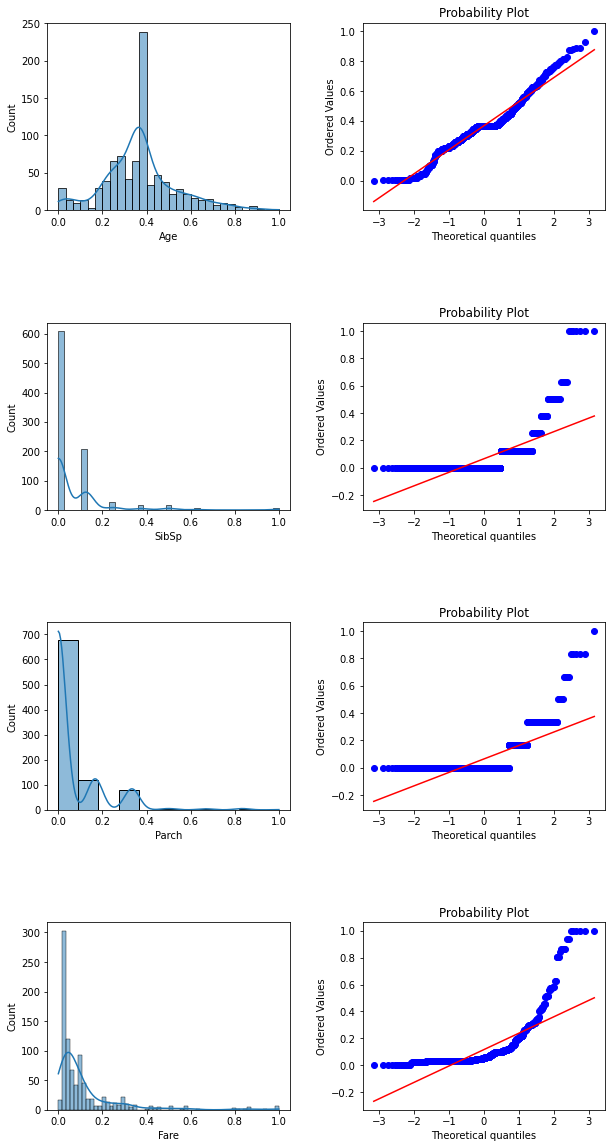

In [77]:
# 13. Для кожної кількісної ознаки побудувати та проаналізувати гістограми, 
#                                  побудувати ймовірнісні сітки та 
#                                  ідентифікувати за ними нормальний закон розподілу.

def get_hist_and_prob(df) :
    plt.figure(figsize=(10, 20))
    plt.subplot(4, 2, 1)
    sb.histplot(df["Age"], kde = True)
    plt.subplot(4, 2, 2)
    ss.probplot(df["Age"], plot = plt)
    plt.subplot(4, 2, 3)
    sb.histplot(df["SibSp"], kde = True)
    plt.subplot(4, 2, 4)
    ss.probplot(df["SibSp"], plot = plt)
    plt.subplot(4, 2, 5)
    sb.histplot(df["Parch"], kde = True)
    plt.subplot(4, 2, 6)
    ss.probplot(df["Parch"], plot = plt)
    plt.subplot(4, 2, 7)
    sb.histplot(df["Fare"], kde = True)
    plt.subplot(4, 2, 8)
    ss.probplot(df["Fare"], plot = plt)
    plt.subplots_adjust(wspace=0.3, hspace=0.6)
    
    
get_hist_and_prob(df)

# Не ідентифікується в жодному з випадків

In [78]:
def get_nr(data, name) :
    alpha = 0.05
    size = data.size

    A = ss.skew(data)
    sigmaA = math.sqrt((6 * (size - 2)) / ((size + 1) * (size + 3)))
    uA = (A - 0) / sigmaA
    
    E = ss.kurtosis(data)
    sigmaE = math.sqrt((24 * size * (size - 2) * (size - 3))/(pow((size + 1), 2) * (size + 3 * (size + 5))))
    uE = (E - 0) / sigmaE
    
    quantile = ss.norm.ppf(1-alpha/2)
    absUA = abs(uA)
    absUE = abs(uE)

    print("\n", name, "\n")
    table = pd.DataFrame(columns={"Параметр","Значення"})
    table.loc[len(table)] = ["A", A]
    table.loc[len(table)] = ["E", E]
    table.loc[len(table)] = ["ABS uA", absUA]
    table.loc[len(table)] = ["ABS uE", absUE]
    table.loc[len(table)] = ["Quantile", quantile]
    table.loc[len(table)] = ["normaltest statistic", ss.normaltest(data).statistic]
    table.loc[len(table)] = ["normaltest pvalue", ss.normaltest(data).statistic]
    table.loc[len(table)] = ["normaltest pvalue > alpha", "ідентифікується" if ss.normaltest(data)[1] > alpha else "не ідентифікується"]
    table.loc[len(table)] = ["shapiro statistic", ss.shapiro(data).statistic]
    table.loc[len(table)] = ["shapiro pvalue", ss.shapiro(data).statistic]
    table.loc[len(table)] = ["shapiro pvalue > alpha", "ідентифікується" if ss.shapiro(data)[1] > alpha else "не ідентифікується"]
    if absUA <= quantile and absUE <= quantile :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл ідентифікується"]
    else :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл не ідентифікується"]
    display(table.style.hide_index())
    
get_nr(df["Age"], "Age")    
get_nr(df["SibSp"], "SibSp")    
get_nr(df["Parch"], "Parch")    
get_nr(df["Fare"], "Fare")


 Age 



Значення,Параметр
A,0.433756
E,0.954139
ABS uA,5.303596
ABS uE,0.391882
Quantile,1.959964
normaltest statistic,43.858966
normaltest pvalue,43.858966
normaltest pvalue > alpha,не ідентифікується
shapiro statistic,0.958822
shapiro pvalue,0.958822



 SibSp 



Значення,Параметр
A,3.689128
E,17.773512
ABS uA,45.107459
ABS uE,7.299903
Quantile,1.959964
normaltest statistic,722.874045
normaltest pvalue,722.874045
normaltest pvalue > alpha,не ідентифікується
shapiro statistic,0.512966
shapiro pvalue,0.512966



 Parch 



Значення,Параметр
A,2.744487
E,9.716613
ABS uA,33.557208
ABS uE,3.990789
Quantile,1.959964
normaltest statistic,543.035282
normaltest pvalue,543.035282
normaltest pvalue > alpha,не ідентифікується
shapiro statistic,0.532815
shapiro pvalue,0.532815



 Fare 



Значення,Параметр
A,3.187861
E,12.012435
ABS uA,38.978400
ABS uE,4.933725
Quantile,1.959964
normaltest statistic,622.445684
normaltest pvalue,622.445684
normaltest pvalue > alpha,не ідентифікується
shapiro statistic,0.604919
shapiro pvalue,0.604919
